In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import missingno as msno
from sklearn.cluster import KMeans
from shapely.geometry import Point
from sklearn.ensemble import RandomForestRegressor


## IMPORTING DATASET 

In [3]:
data = pd.read_excel("Environment Solar Data.xlsx")

In [21]:
data.head()

,Date,Longitude,Latitude,Sunhine Hours,Avg. Wind Speed,Property prices,month,year
0,2018-01-01,0.22,0.27,45.36,2.560,304.0,1,2018
1,2018-01-01,0.28,0.23,34.02,3.216,318.0,1,2018
2,2018-01-01,0.28,0.27,45.36,3.144,102.0,1,2018
3,2018-01-01,0.35,0.20,30.78,3.664,248.0,1,2018
4,2018-01-01,0.18,0.30,33.21,2.632,326.0,1,2018


In [22]:
data.isnull().sum()

Date               0
Longitude          0
Latitude           0
Sunhine Hours      2
Avg. Wind Speed    1
Property prices    1
month              0
year               0
dtype: int64

In [25]:
data= data.dropna().reset_index(drop = True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3300 non-null   datetime64[ns]
 1   Longitude        3300 non-null   float64       
 2   Latitude         3300 non-null   float64       
 3   Sunhine Hours    3300 non-null   float64       
 4   Avg. Wind Speed  3300 non-null   float64       
 5   Property prices  3300 non-null   float64       
 6   month            3300 non-null   int64         
 7   year             3300 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 206.4 KB


## DATA PREPARATION 

In [5]:
data['month'] = data['Date'].dt.month

In [7]:
data_by_month = data.groupby('month')['Sunhine Hours'].sum()
data.head()

,Date,Longitude,Latitude,Sunhine Hours,Avg. Wind Speed,Property prices,month
0,2018-01-01,0.22,0.27,45.36,2.560,304.0,1
1,2018-01-01,0.28,0.23,34.02,3.216,318.0,1
2,2018-01-01,0.28,0.27,45.36,3.144,102.0,1
3,2018-01-01,0.35,0.20,30.78,3.664,248.0,1
4,2018-01-01,0.18,0.30,33.21,2.632,326.0,1


In [9]:
data['year'] = data['Date'].dt.year

In [10]:
data_by_year = data.groupby('year')['Sunhine Hours'].sum()

In [11]:
data.head()

,Date,Longitude,Latitude,Sunhine Hours,Avg. Wind Speed,Property prices,month,year
0,2018-01-01,0.22,0.27,45.36,2.560,304.0,1,2018
1,2018-01-01,0.28,0.23,34.02,3.216,318.0,1,2018
2,2018-01-01,0.28,0.27,45.36,3.144,102.0,1,2018
3,2018-01-01,0.35,0.20,30.78,3.664,248.0,1,2018
4,2018-01-01,0.18,0.30,33.21,2.632,326.0,1,2018


## DATA CLEANING

In [18]:
data.drop_duplicates(subset=['Latitude', 'Longitude'])
data.head()

,Date,Longitude,Latitude,Sunhine Hours,Avg. Wind Speed,Property prices,month,year
0,2018-01-01,0.22,0.27,45.36,2.560,304.0,1,2018
1,2018-01-01,0.28,0.23,34.02,3.216,318.0,1,2018
2,2018-01-01,0.28,0.27,45.36,3.144,102.0,1,2018
3,2018-01-01,0.35,0.20,30.78,3.664,248.0,1,2018
4,2018-01-01,0.18,0.30,33.21,2.632,326.0,1,2018


In [1]:
X=data.loc[:,['Latitude','Longitude']]

NameError: name 'data' is not defined

In [14]:
X=X.drop_duplicates(subset=['Latitude', 'Longitude'])

In [15]:
print(X)

    Latitude  Longitude
0      0.270      0.220
1      0.230      0.280
2      0.270      0.280
3      0.200      0.350
4      0.300      0.180
5      0.320      0.310
6      0.250      0.300
7      0.200      0.200
8      0.250      0.230
9      0.210      0.210
10     0.700      0.220
11     0.680      0.280
12     0.690      0.280
13     0.700      0.350
14     0.800      0.180
15     0.750      0.310
16     0.720      0.300
17     0.770      0.200
18     0.760      0.230
19     0.740      0.210
20     0.700      0.720
21     0.680      0.640
22     0.690      0.630
23     0.700      0.680
24     0.800      0.770
25     0.750      0.770
26     0.720      0.760
27     0.770      0.740
28     0.760      0.720
29     0.740      0.700
30     0.220      0.720
31     0.260      0.640
32     0.280      0.630
33     0.250      0.680
34     0.180      0.770
35     0.310      0.770
36     0.300      0.760
37     0.200      0.740
38     0.230      0.720
39     0.210      0.700
40     0.929    

## CREATING UNIQUE LABEL FOR ZONE BY **CLUSTERING METHOD**

In [16]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = X[['Latitude']]
X_axis = X[['Longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

C:\Users\HP\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known

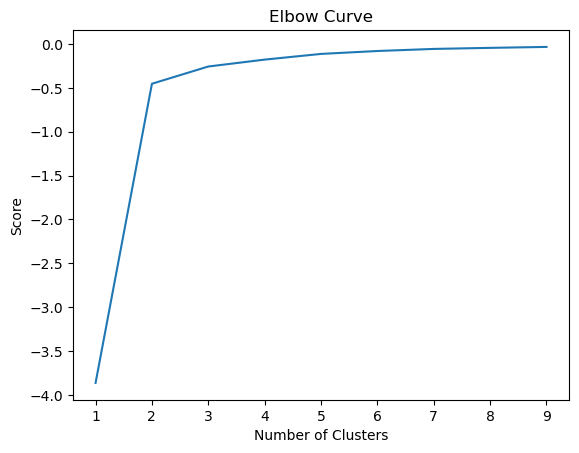

In [17]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')


plt.show()

## FORMING ZONE FROM UNIQUE LABELS

In [15]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering. # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:2]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:2]]) # Labels of each point

X.head(10)

C:\Users\HP\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known

,Latitude,Longitude,cluster_label
0,0.27,0.22,0
1,0.23,0.28,0
2,0.27,0.28,0
3,0.20,0.35,0
4,0.30,0.18,0
5,0.32,0.31,0
6,0.25,0.30,0
7,0.20,0.20,0
8,0.25,0.23,0
9,0.21,0.21,0


In [16]:
print(X)

    Latitude  Longitude  cluster_label
0      0.270      0.220              0
1      0.230      0.280              0
2      0.270      0.280              0
3      0.200      0.350              0
4      0.300      0.180              0
5      0.320      0.310              0
6      0.250      0.300              0
7      0.200      0.200              0
8      0.250      0.230              0
9      0.210      0.210              0
10     0.700      0.220              0
11     0.680      0.280              0
12     0.690      0.280              0
13     0.700      0.350              0
14     0.800      0.180              0
15     0.750      0.310              0
16     0.720      0.300              0
17     0.770      0.200              0
18     0.760      0.230              0
19     0.740      0.210              0
20     0.700      0.720              1
21     0.680      0.640              1
22     0.690      0.630              1
23     0.700      0.680              1
24     0.800      0.770  

## ALLOCATING REGION TO PARTICULAR ZONE

In [17]:
X["region"] = X["cluster_label"].apply(lambda cluster_label: "North_west" if cluster_label== 0 else ("North_east" if cluster_label== 1 else ("South_west" if cluster_label== 2 else ("South_east" if cluster_label==3 else None))) 
)


In [18]:
print(X)

    Latitude  Longitude  cluster_label      region
0      0.270      0.220              0  North_west
1      0.230      0.280              0  North_west
2      0.270      0.280              0  North_west
3      0.200      0.350              0  North_west
4      0.300      0.180              0  North_west
5      0.320      0.310              0  North_west
6      0.250      0.300              0  North_west
7      0.200      0.200              0  North_west
8      0.250      0.230              0  North_west
9      0.210      0.210              0  North_west
10     0.700      0.220              0  North_west
11     0.680      0.280              0  North_west
12     0.690      0.280              0  North_west
13     0.700      0.350              0  North_west
14     0.800      0.180              0  North_west
15     0.750      0.310              0  North_west
16     0.720      0.300              0  North_west
17     0.770      0.200              0  North_west
18     0.760      0.230        

In [19]:
X1 = X.drop(columns=["Longitude", "Latitude"])

In [20]:
X1 = X.rename(columns={"cluster_label": "Zone"})

In [21]:
display(pd.DataFrame(X1))

,Latitude,Longitude,Zone,region
0,0.270,0.220,0,North_west
1,0.230,0.280,0,North_west
2,0.270,0.280,0,North_west
3,0.200,0.350,0,North_west
4,0.300,0.180,0,North_west
5,0.320,0.310,0,North_west
6,0.250,0.300,0,North_west
7,0.200,0.200,0,North_west
8,0.250,0.230,0,North_west
9,0.210,0.210,0,North_west


In [22]:
DATA = data1.merge(X1, left_on = ['Longitude','Latitude'], right_on = ['Longitude','Latitude'])

## CONVERT SUNSHINE HOURS INTO YEARLY SUNSHINE HOURS 

In [23]:
DATA['Sunhine Hours']=DATA['Sunhine Hours']*12

In [24]:
DATA

,Date,Longitude,Latitude,Sunhine Hours,Avg. Wind Speed,Property prices,month,year,Zone,region
0,2018-01-01,0.22,0.270,544.32,2.560,304.0,1,2018,0,North_west
1,2018-02-01,0.22,0.270,690.12,2.456,304.0,2,2018,0,North_west
2,2018-03-01,0.22,0.270,1185.84,3.672,304.0,3,2018,0,North_west
3,2018-04-01,0.22,0.270,1380.24,2.752,304.0,4,2018,0,North_west
4,2018-05-01,0.22,0.270,1720.44,3.104,304.0,5,2018,0,North_west
...,...,...,...,...,...,...,...,...,...,...
3299,2022-04-01,0.18,0.611,1660.80,3.816,127.0,4,2022,0,North_west
3300,2022-05-01,0.18,0.611,1497.60,4.437,127.0,5,2022,0,North_west
3301,2022-06-01,0.18,0.611,2131.20,2.943,127.0,6,2022,0,North_west
3302,2022-07-01,0.18,0.611,1939.20,3.933,127.0,7,2022,0,North_west


## LINEAR REGRESSION

In [25]:
model = LinearRegression()


In [26]:
data2 = pd.read_excel('Installed Solar Plants.xlsx')
print(data2)

    Model ID  Sunshine Hours per year  Size Solar Panel m2  \
0          1                     1418                  794   
1          2                     1474                 1726   
2          3                     1335                 5776   
3          4                     1224                 6494   
4          5                     1320                 2085   
5          6                     1203                 4773   
6          7                     1406                   81   
7          8                     1449                 3387   
8          9                     1133                  449   
9         10                     1313                  903   
10        11                     1346                 6130   
11        12                     1235                 6639   
12        13                     1232                 6256   
13        14                     1101                 4696   
14        15                     1175                 5299   
15      

In [27]:
model.fit(data2[['Sunshine Hours per year']], data2['kWh/m2'])


LinearRegression()

In [28]:
print(model.intercept_)
print(model.coef_)

36.40770189985179
[0.18181943]


## y=mx+c

In [29]:
DATA['Generated_Energy'] = 0.18181943*DATA['Sunhine Hours'] + 36.40770189985179
DATA

,Date,Longitude,Latitude,Sunhine Hours,Avg. Wind Speed,Property prices,month,year,Zone,region,Generated_Energy
0,2018-01-01,0.22,0.270,544.32,2.560,304.0,1,2018,0,North_west,135.375654
1,2018-02-01,0.22,0.270,690.12,2.456,304.0,2,2018,0,North_west,161.884927
2,2018-03-01,0.22,0.270,1185.84,3.672,304.0,3,2018,0,North_west,252.016455
3,2018-04-01,0.22,0.270,1380.24,2.752,304.0,4,2018,0,North_west,287.362152
4,2018-05-01,0.22,0.270,1720.44,3.104,304.0,5,2018,0,North_west,349.217122
...,...,...,...,...,...,...,...,...,...,...,...
3299,2022-04-01,0.18,0.611,1660.80,3.816,127.0,4,2022,0,North_west,338.373411
3300,2022-05-01,0.18,0.611,1497.60,4.437,127.0,5,2022,0,North_west,308.700480
3301,2022-06-01,0.18,0.611,2131.20,2.943,127.0,6,2022,0,North_west,423.901271
3302,2022-07-01,0.18,0.611,1939.20,3.933,127.0,7,2022,0,North_west,388.991941


property price lowest is 57 
highest :330
to get max. sunshine hours & property prices

In [30]:
DATA[['Sunhine Hours']][DATA['Property prices']==57].mean()

Sunhine Hours    1112.164286
dtype: float64

In [31]:
IMPORTANT = DATA.groupby(['Longitude','Latitude','region']).agg({'Sunhine Hours':'mean','Property prices':'mean','Zone':'mean','Generated_Energy':'mean'}).reset_index()

In [32]:
IMPORTANT

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
0,0.014,0.729,South_east,1156.928571,67.0,3.0,246.759795
1,0.025,0.472,South_east,1131.634286,116.0,3.0,242.160803
2,0.064,0.835,South_east,1139.567143,91.0,3.0,243.603150
3,0.081,0.805,South_east,1130.978571,65.0,3.0,242.041581
4,0.124,0.413,South_east,1160.554286,126.0,3.0,247.419021
5,0.137,0.710,South_east,1180.821429,86.0,3.0,251.103981
6,0.160,0.173,South_east,1163.729455,130.0,3.0,247.996328
7,0.164,0.106,South_east,1121.288571,95.0,3.0,240.279751
8,0.180,0.300,North_west,1291.221964,326.0,0.0,271.176943
9,0.180,0.611,North_west,1130.082857,127.0,0.0,241.878723


In [33]:
#NORTH WEST

In [34]:
NORTH_WEST = IMPORTANT[IMPORTANT['region']=="North_west"]
NORTH_WEST


,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
8,0.180,0.300,North_west,1291.221964,326.0,0.0,271.176943
9,0.180,0.611,North_west,1130.082857,127.0,0.0,241.878723
10,0.180,0.800,North_west,1303.584107,276.0,0.0,273.424621
11,0.200,0.200,North_west,1292.041607,105.0,0.0,271.325970
12,0.200,0.770,North_west,1286.694643,224.0,0.0,270.353788
13,0.210,0.210,North_west,1261.748571,273.0,0.0,265.818108
14,0.210,0.740,North_west,1255.543393,312.0,0.0,264.689886
15,0.220,0.270,North_west,1285.228929,304.0,0.0,270.087293
16,0.220,0.700,North_west,1269.559286,174.0,0.0,267.238248
17,0.230,0.250,North_west,1276.420179,159.0,0.0,268.485691


In [35]:
NORTH_WEST = NORTH_WEST.sort_values(by=['Property prices','Generated_Energy'])
NORTH_WEST

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
19,0.233,0.623,North_west,1127.112857,73.0,0.0,241.338719
22,0.280,0.270,North_west,1282.220357,102.0,0.0,269.540276
11,0.200,0.200,North_west,1292.041607,105.0,0.0,271.325970
9,0.180,0.611,North_west,1130.082857,127.0,0.0,241.878723
20,0.233,0.929,North_west,1136.828571,128.0,0.0,243.105225
25,0.300,0.250,North_west,1272.837857,129.0,0.0,267.834356
23,0.280,0.680,North_west,1304.996786,131.0,0.0,273.681474
18,0.230,0.760,North_west,1266.811071,137.0,0.0,266.738569
31,0.373,0.002,North_west,1147.204286,139.0,0.0,244.991731
17,0.230,0.250,North_west,1276.420179,159.0,0.0,268.485691


In [36]:
min_propertyprice_NW = NORTH_WEST[NORTH_WEST['Property prices']==NORTH_WEST['Property prices'].min()]
min_propertyprice_NW

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
19,0.233,0.623,North_west,1127.112857,73.0,0.0,241.338719


In [37]:
Max_GeneratedEnergy_NW = NORTH_WEST[NORTH_WEST['Generated_Energy']==NORTH_WEST['Generated_Energy'].max()]
Max_GeneratedEnergy_NW

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
30,0.35,0.7,North_west,1315.660909,277.0,0.0,275.620418


In [38]:
# NORTH EAST

In [39]:
NORTH_EAST = IMPORTANT[IMPORTANT['region']== "North_east"]
NORTH_EAST

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
32,0.567,0.727,North_east,1336.118571,149.0,1.0,279.340019
33,0.617,0.514,North_east,1114.937143,137.0,1.0,239.124938
34,0.630,0.280,North_east,1098.385714,61.0,1.0,236.115566
35,0.630,0.690,North_east,1158.064286,150.0,1.0,246.966290
36,0.640,0.260,North_east,1148.657143,117.0,1.0,245.255889
37,0.640,0.680,North_east,1125.844286,74.0,1.0,241.108068
38,0.680,0.250,North_east,1144.800000,134.0,1.0,244.554585
39,0.680,0.700,North_east,1112.207143,93.0,1.0,238.628571
40,0.700,0.210,North_east,1144.234286,93.0,1.0,244.451728
41,0.700,0.740,North_east,1136.922857,149.0,1.0,243.122368


In [40]:
NORTH_EAST = NORTH_EAST.sort_values(by=['Property prices'])
NORTH_EAST

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
34,0.630,0.280,North_east,1098.385714,61.0,1.0,236.115566
45,0.720,0.700,North_east,1119.681429,73.0,1.0,239.987541
37,0.640,0.680,North_east,1125.844286,74.0,1.0,241.108068
43,0.720,0.220,North_east,1087.371429,82.0,1.0,234.112955
46,0.720,0.760,North_east,1145.837143,90.0,1.0,244.743158
39,0.680,0.700,North_east,1112.207143,93.0,1.0,238.628571
40,0.700,0.210,North_east,1144.234286,93.0,1.0,244.451728
44,0.720,0.230,North_east,1131.115714,98.0,1.0,242.066516
42,0.715,0.211,North_east,1118.151429,107.0,1.0,239.709357
36,0.640,0.260,North_east,1148.657143,117.0,1.0,245.255889


In [41]:
min_propertyprice_NE = NORTH_EAST[NORTH_EAST['Property prices']==NORTH_EAST['Property prices'].min()]
min_propertyprice_NE

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
34,0.63,0.28,North_east,1098.385714,61.0,1.0,236.115566


In [42]:
Max_GeneratedEnergy_NE = NORTH_EAST[NORTH_EAST['Generated_Energy']==NORTH_EAST['Generated_Energy'].max()]
Max_GeneratedEnergy_NE

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
32,0.567,0.727,North_east,1336.118571,149.0,1.0,279.340019


In [43]:
# SOUTH WEST

In [44]:
SOUTH_WEST = IMPORTANT[IMPORTANT['region']== "South_west"]
SOUTH_WEST

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
47,0.740,0.200,South_west,1106.447143,72.0,2.0,237.581291
48,0.740,0.770,South_west,1160.970000,87.0,2.0,247.494606
49,0.760,0.300,South_west,1127.485714,96.0,2.0,241.406512
50,0.760,0.720,South_west,1161.424286,137.0,2.0,247.577204
51,0.770,0.180,South_west,1112.164286,57.0,2.0,238.620778
52,0.770,0.310,South_west,1167.107143,139.0,2.0,248.610457
53,0.770,0.750,South_west,1146.295714,108.0,2.0,244.826535
54,0.770,0.800,South_west,1158.085714,92.0,2.0,246.970186
55,0.808,0.505,South_west,1108.628571,99.0,2.0,237.977917
56,0.856,0.100,South_west,1146.467143,112.0,2.0,244.857704


In [45]:
SOUTH_WEST = SOUTH_WEST.sort_values(by=['Property prices'])
SOUTH_WEST

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
51,0.770,0.180,South_west,1112.164286,57.0,2.0,238.620778
47,0.740,0.200,South_west,1106.447143,72.0,2.0,237.581291
57,0.864,0.838,South_west,1118.584286,74.0,2.0,239.788059
48,0.740,0.770,South_west,1160.970000,87.0,2.0,247.494606
54,0.770,0.800,South_west,1158.085714,92.0,2.0,246.970186
49,0.760,0.300,South_west,1127.485714,96.0,2.0,241.406512
55,0.808,0.505,South_west,1108.628571,99.0,2.0,237.977917
53,0.770,0.750,South_west,1146.295714,108.0,2.0,244.826535
56,0.856,0.100,South_west,1146.467143,112.0,2.0,244.857704
58,0.873,0.379,South_west,1135.157143,115.0,2.0,242.801327


In [46]:
min_propertyprice_SW = SOUTH_WEST[SOUTH_WEST['Property prices']==SOUTH_WEST['Property prices'].min()]
min_propertyprice_SW

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
51,0.77,0.18,South_west,1112.164286,57.0,2.0,238.620778


In [47]:
Max_GeneratedEnergy_SW = SOUTH_WEST[SOUTH_WEST['Generated_Energy']==SOUTH_WEST['Generated_Energy'].max()]
Max_GeneratedEnergy_SW

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
52,0.77,0.31,South_west,1167.107143,139.0,2.0,248.610457


In [48]:
# SOUTH EAST 

In [49]:
SOUTH_EAST = IMPORTANT[IMPORTANT['region']== "South_east"]
SOUTH_EAST

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
0,0.014,0.729,South_east,1156.928571,67.0,3.0,246.759795
1,0.025,0.472,South_east,1131.634286,116.0,3.0,242.160803
2,0.064,0.835,South_east,1139.567143,91.0,3.0,243.603150
3,0.081,0.805,South_east,1130.978571,65.0,3.0,242.041581
4,0.124,0.413,South_east,1160.554286,126.0,3.0,247.419021
5,0.137,0.710,South_east,1180.821429,86.0,3.0,251.103981
6,0.160,0.173,South_east,1163.729455,130.0,3.0,247.996328
7,0.164,0.106,South_east,1121.288571,95.0,3.0,240.279751


In [50]:
SOUTH_EAST = SOUTH_EAST.sort_values(by=['Property prices'])
SOUTH_EAST

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
3,0.081,0.805,South_east,1130.978571,65.0,3.0,242.041581
0,0.014,0.729,South_east,1156.928571,67.0,3.0,246.759795
5,0.137,0.710,South_east,1180.821429,86.0,3.0,251.103981
2,0.064,0.835,South_east,1139.567143,91.0,3.0,243.603150
7,0.164,0.106,South_east,1121.288571,95.0,3.0,240.279751
1,0.025,0.472,South_east,1131.634286,116.0,3.0,242.160803
4,0.124,0.413,South_east,1160.554286,126.0,3.0,247.419021
6,0.160,0.173,South_east,1163.729455,130.0,3.0,247.996328


In [51]:
min_propertyprice_SE = SOUTH_EAST[SOUTH_EAST['Property prices']==SOUTH_EAST['Property prices'].min()]
min_propertyprice_SE

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
3,0.081,0.805,South_east,1130.978571,65.0,3.0,242.041581


In [52]:
Max_GeneratedEnergy_SE = SOUTH_EAST[SOUTH_EAST['Generated_Energy']==SOUTH_EAST['Generated_Energy'].max()]
Max_GeneratedEnergy_SE

,Longitude,Latitude,region,Sunhine Hours,Property prices,Zone,Generated_Energy
5,0.137,0.71,South_east,1180.821429,86.0,3.0,251.103981


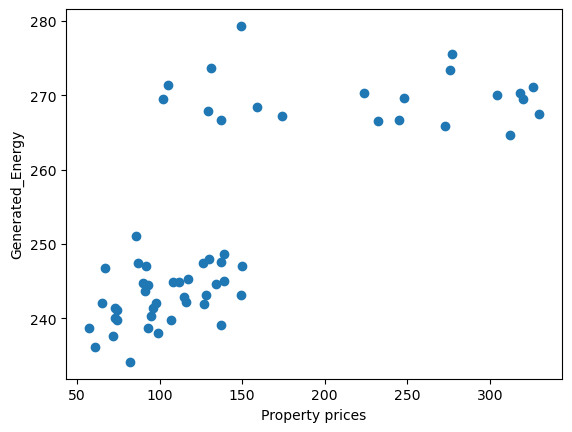

In [53]:
plt.scatter(IMPORTANT['Property prices'], IMPORTANT['Generated_Energy'])
plt.xlabel('Property prices')
plt.ylabel('Generated_Energy')
plt.show()

In [54]:
x = IMPORTANT[['Property prices']]
y = IMPORTANT[['Generated_Energy']]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [56]:
 reg = LinearRegression().fit(x, y)

In [57]:
y_pred = reg.predict(x_test)

In [58]:
r2_score(y_test,y_pred)

0.6784511660567751